
# 資料預處理步驟:
# 1. 補缺失值
# 2. OHE(把類別轉換成數字但又不要有大小關係)
# 3. 複雜的處理可以用pd.apply自己寫function

In [ ]:
import pandas as pd
traindf=pd.read_csv("/content/train.csv",encoding='utf-8')
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
testdf=pd.read_csv("/content/test.csv",encoding='utf-8')
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#查看缺失資料
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 填補缺失值，有大小關係填中位數
# 通常填中位數比平均值好
# 找出資料集的中位數(數值才有)
med=traindf.median()
# pandas的東西都要設定回去
traindf = traindf.fillna(med)
traindf.isna().sum()

<ipython-input-4-2155c82db9c5>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med=traindf.median()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 看個測試欄位與缺失數量
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# 為測試資料填補，不然無法使用測試資料
# 不要用測試資料的中位數，用訓練資料的
# 因為訓練資料較多，中位數較準

testdf = testdf.fillna(med)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# 填訓練資料的缺失值

# 要找出出現次數最多的值填入缺失欄位
# idxmax() 可以印出最大值的索引
most = traindf['Embarked'].value_counts().idxmax()
traindf['Embarked']=traindf['Embarked'].fillna(most)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


One-Hot Encoding（OHE）主要應用在機器學習和統計分析中，特別是當你處理分類特徵（Categorical Features）時。分類特徵是指那些表示類別或類別型資訊的特徵，而這些特徵的值通常是有限且固定的。

OHE的主要目的是將分類特徵轉換為機器學習模型更容易處理的格式，同時避免引入不正確的大小或順序關係。一些常見的應用場景包括：

處理文字數據： 在自然語言處理（NLP）任務中，文字資料通常包含類別型資訊，如詞性、情感標籤等。透過OHE，將這些文字類別轉換為二元表示，有助於模型學習相應的模式。

處理類別型特徵： 在結構化資料中，例如表格數據中的某些列，可能包含像性別、顏色、地區等分類特徵。OHE可用於將這些分類特徵轉換為二元欄位，以供機器學習模型使用。

避免數值偏好： 機器學習模型通常基於數學運算，對於有大小或順序的數值特徵更容易處理。為了避免模型誤解分類特徵的大小順序，OHE是一個常見的處理方式。

在你提到的鐵達尼號預測資料集中，OHE用於處理登船港口的分類特徵，以便將其轉換為模型能夠理解的格式。這樣的處理方式有助於確保模型不會將登船港口視為具有順序或大小關係的數值。

In [ ]:
# 因為函式庫只能丟數字，所以要把文字轉數字
# 但是不能有幾種就轉數字0, 1, 2, 3...，因為有大小關係！
# 所以使用One-Hot-Encoding
# 使用pd.get_dummies快速生成OHE
dummy = pd.get_dummies(traindf['Embarked'])
dummy

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html
# 使用pd.concat連接兩個DataFrames
# 這邊把訓練資料跟OHE接在一起
# 接的方向有橫或直的，axis參數是對齊的方向
# axis=0接直的，axis=1接橫的
traindf = pd.concat([traindf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [ ]:
# 這邊把測試資料跟OHE接在一起
dummy = pd.get_dummies(testdf['Embarked'])
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1


In [ ]:
# 'Sex'欄位的OHE
dummy = pd.get_dummies(traindf['Sex'])
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf['Sex'])
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,1


In [ ]:
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1


In [ ]:
# 處理比較困難的資料(這裡看Name)
# 等等使用pd.apply()
# 取出Name欄位的稱謂
mid = "Dooley, Mr. Patrick".split(',')[-1].split('.')[0]
mid = mid.replace(' ', '')
mid

'Mr'

data['特定欄位'].apply() 是 Pandas 中用於對資料框架中某一欄位應用自定義函數的方法。這個方法主要用於對該欄位的每一個元素進行相同的操作或轉換。這種方法常用於資料清理、特徵工程或者對資料進行一些自定義轉換的情境。

In [ ]:
# 處理稱謂欄位，簡化並減少稱謂種類

# 定義一個函式，用字串處理方式來簡化稱謂
def nameflow(s):
    mid = s.split(',')[-1].split('.')[0]
    mid = mid.replace(' ', '')
    return mid
# 使用apply()套用剛剛寫的函式
name = traindf['Name'].apply(nameflow)
name

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
name.value_counts()

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: Name, dtype: int64

In [ ]:
# pd.corsstab可以幫你比對兩個欄位對應在彼此的數量
# 最後的.T是Transpose，可以翻轉行列，方便觀看
pd.crosstab(name,traindf['Survived']).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [ ]:
# 選擇稱謂捨棄與否
# 用字典方式達到switch case
# 字典.get(key, 若找不到回傳的值，預設None)
def select_name(s):
    d = {
        'Master' : 'Master',
        'Miss' : 'Miss',
        'Mr' : 'Mr',
        'Mrs' : 'Mrs'
    }
    return d.get(s)
name.apply(select_name)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    None
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
# 將處理過的稱謂做成OHE，再拼接到訓練資料
name = traindf['Name'].apply(nameflow).apply(select_name)
dummy = pd.get_dummies(name)
traindf = pd.concat([traindf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,0,1,0,1,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,0,1,1,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,S,0,0,1,1,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,1,0,0,0,1,0,0,1,0


In [ ]:
# 將處理過的稱謂做成OHE，再拼接到訓練資料
name = testdf['Name'].apply(nameflow).apply(select_name)
dummy = pd.get_dummies(name)
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0,0,1,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0,0,1,0


In [ ]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'female',
       'male', 'Master', 'Miss', 'Mr', 'Mrs'],
      dtype='object')

In [ ]:
traindf=traindf.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
testdf = testdf.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
traindf

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1,0,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,0,1,0,0
888,0,3,28.0,1,2,23.4500,0,0,1,1,0,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1,0,0,1,0


In [ ]:
testdf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,0,1,0
416,1308,3,28.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


# 處理前後差別:
# 處理完後，所有資料都變成數值，原本是文字的資料也轉成OHE了，因為函式庫只能用數字
# traindf跟testdf欄位有些差別
# train沒有PassengerId，test有，因為這特徵訓練沒用，但測試需要此特徵填答案。
# train有Survived，test沒有，因為這是答案。




In [ ]:
traindf.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.543351,-0.543351,0.085221,0.327093,-0.549199,0.339040
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.131900,0.131900,0.082081,-0.000576,0.142698,-0.149209
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,-0.081163,0.081163,-0.373960,-0.247483,0.180808,0.169578
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.114631,-0.114631,0.349559,0.087932,-0.250489,0.063407
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.245489,-0.245489,0.267344,0.105567,-0.333905,0.225852
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.182333,-0.182333,0.010908,0.118271,-0.183766,0.105203
C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.082853,-0.082853,-0.035225,0.026215,-0.072567,0.061395
Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.074115,-0.074115,0.010478,0.171117,-0.078338,-0.089739
S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.119224,0.119224,0.024264,-0.130650,0.112870,0.002689
female,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224,1.000000,-1.000000,-0.159934,0.686808,-0.867334,0.547600


<Axes: >

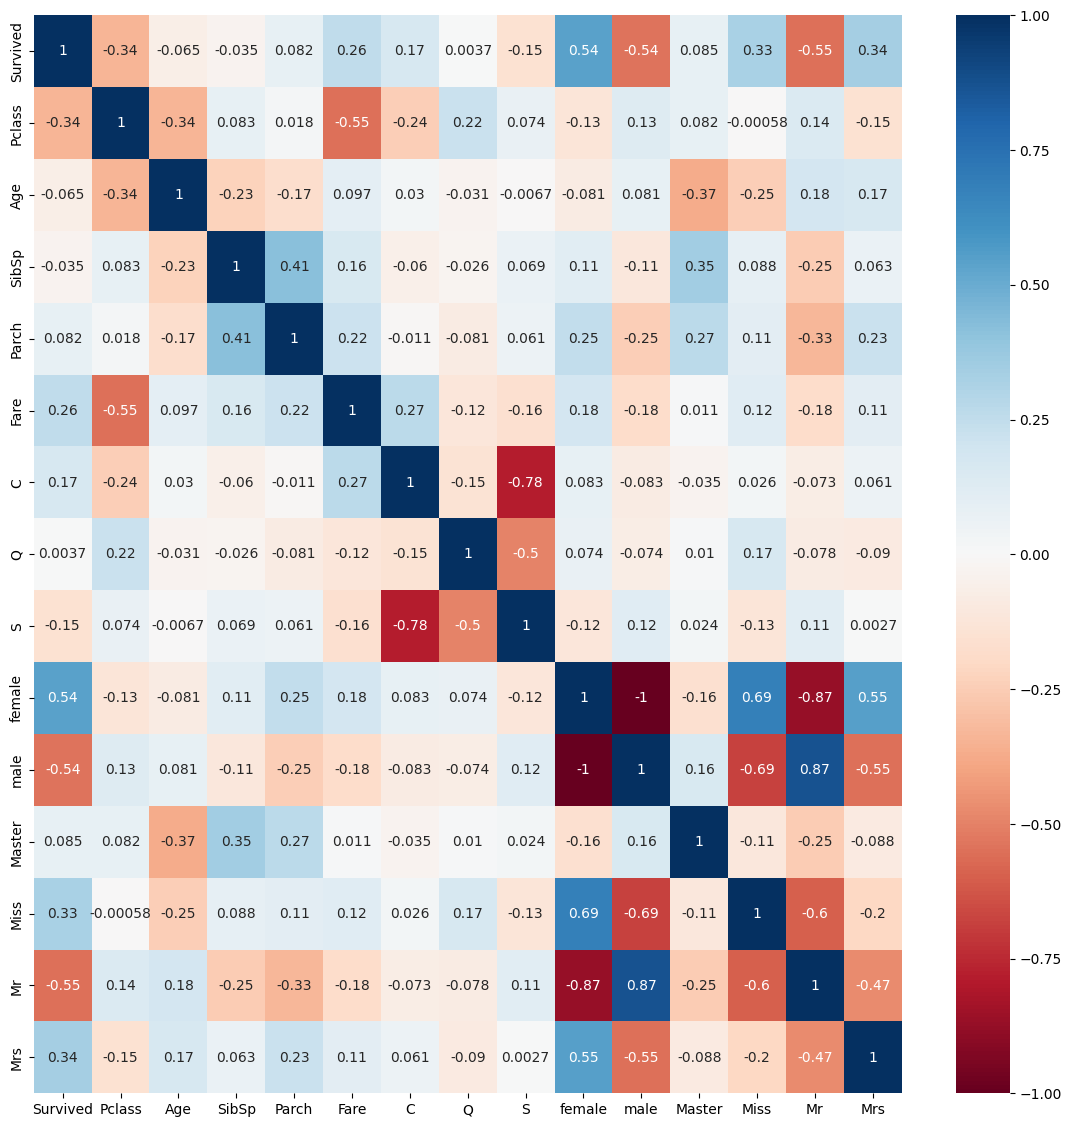

In [ ]:
#畫出關係圖
# seaborn是基於matplotlib的進階函式庫
import matplotlib.pyplot as plt
import seaborn as sns
# %是Magic Command，只能在notebook使用
# 這行可以讓圖自動plt.show()
%matplotlib inline
# 調整圖像大小
plt.figure(figsize=(14, 14))

# annot可決定是否在圖中印出數值
# cmap顏色代碼可在下列網址尋找
# https://matplotlib.org/stable/tutorials/colors/colormaps.html#lightness-of-matplotlib-colormaps
sns.heatmap(traindf.corr(), annot=True, cmap='RdBu')

1.利用xgboost分類器做預測，使用隨機參數搜尋法找出最佳參數

In [ ]:
!pip install --user xgboost

In [ ]:
# for Google colab upgrade sgbost
!pip install --upgrade xgboost

In [ ]:
import xgboost as xgb
print(xgb.__version__)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# 把訓練資料的答案丟掉
trainx = traindf.drop(['Survived'], axis=1)
# 將答案當作目標資料
trainy = traindf['Survived']
# 定義 XGBoost 分類器
clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)

In [ ]:
# 定義超參數的範圍
param_dist = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# 使用隨機搜尋進行超參數調整
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, scoring='neg_log_loss', n_jobs=-1, cv=5, verbose=10, random_state=42)
random_search.fit(trainx,trainy)

In [ ]:
# 最佳超參數
best_params = random_search.best_params_
print("最佳超參數：", best_params)

In [ ]:

# 把旅客ID取出
testx = testdf.drop(['PassengerId'], axis=1)
# 存下旅客ID
testid = testdf['PassengerId']

#依照最佳參數做調整
clf = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', seed=42)
clf.fit(trainx,trainy) #本段執行20秒

# 利用訓練好的模型預測測試資料
pre = clf.predict(testx)
# 將計算結果存下，並輸出成csv檔
result = pd.DataFrame()
result['PassengerId'] = testid
result['Survived'] = pre
result.to_csv('result.csv', encoding='utf-8', index=False)
result

上面再訓練的過程中可能會遇到XGBoostError: [07:27:51] /workspace/src/objective/regression_obj.cu:48: Check failed: info.labels.Size() == preds.Size() (891 vs. 1782) : Invalid shape of labels.

這個錯誤通常是由於 RandomizedSearchCV 中的交叉驗證導致的。在進行交叉驗證時，RandomizedSearchCV 將訓練資料集分成多個子集，以便進行多次模型擬合和評估。但是，它可能會將目標變量 trainy 重新調整形狀，導致與原始 trainy 的行數不一致。

為了解決這個問題，你可以修改 RandomizedSearchCV 的 cv 參數，以便它不會對目標變量進行調整形狀。此外，為了提高準確性，你可以增加 n_iter 參數的值，使搜索空間更大。